In [30]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mn
import re
import pickle
import datetime as dt
import math

#
!pip install category_encoders
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
from sklearn.metrics import accuracy_score as acc, precision_score as pre, recall_score as rec, f1_score as f1
from sklearn.metrics import confusion_matrix as cm, classification_report as cr

#
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
!pip install openml
import openml.datasets as datasets
import requests as r

#
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.pipeline import Pipeline
#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.cluster import DBSCAN


In [31]:
d=pd.read_json("/content/drive/MyDrive/Study/GitHub/Machine Learning Projects/Completed/Covid_19_Contact_Tracing_App_using_DBSCAN/livedata.json")

In [ ]:
d.shape

(100, 4)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         100 non-null    object        
 1   timestamp  100 non-null    datetime64[ns]
 2   latitude   100 non-null    float64       
 3   longitude  100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.2+ KB


In [ ]:
d.columns

Index(['id', 'timestamp', 'latitude', 'longitude'], dtype='object')

In [ ]:
d.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
timestamp,100,2020-07-04 17:41:29.999999232,2020-07-04 12:35:30,2020-07-04 14:35:30,2020-07-04 17:05:30,2020-07-04 20:35:30,2020-07-04 23:35:30,NaN
latitude,100.0,13.134709,13.010284,13.081266,13.133868,13.195195,13.249645,0.069591
longitude,100.0,77.639229,77.553381,77.596577,77.64624,77.681645,77.705454,0.046132


In [ ]:
d.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


In [ ]:
d["latitude"]=d["latitude"].apply(math.radians)
d["longitude"]=d["longitude"].apply(math.radians)

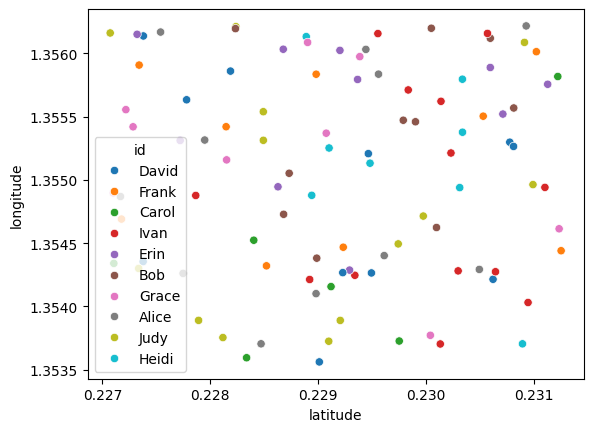

In [ ]:
sns.scatterplot(x="latitude", y="longitude", data=d,hue="id");

In [ ]:
d.head(10)

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,0.229493,1.354265
1,David,2020-07-04 16:35:30,0.230774,1.355298
2,Frank,2020-07-04 14:35:30,0.231021,1.356012
3,Carol,2020-07-04 21:35:30,0.229750,1.353727
4,Ivan,2020-07-04 22:35:30,0.230944,1.354031
5,Erin,2020-07-04 14:35:30,0.229201,1.356023
6,Bob,2020-07-04 13:35:30,0.230811,1.355568
7,Grace,2020-07-04 14:35:30,0.229385,1.355974
8,Alice,2020-07-04 22:35:30,0.228470,1.353705
9,Frank,2020-07-04 12:35:30,0.230528,1.355503


#**Creating a Model for Contact Tracing with Machine Learning**

In [ ]:
def get_infected_names(input_name):

    epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=epsilon, min_samples=3, metric='haversine')
    model.fit(d[['latitude', 'longitude']])
    d['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for i in range(len(d)):
        if d['id'][i] == input_name:
            if d['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(d['cluster'][i])

    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = d.loc[d['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    return infected_names
print(get_infected_names("David"))

['Frank', 'Carol', 'Ivan', 'Erin', 'Bob', 'Grace', 'Alice', 'Judy', 'Heidi']


In [ ]:
# def get_infected_name(input_nam)

#   epsilon_value=0.002
#   model_1=DBSCAN(eps=epsilon_value, min_samples=4,metric="haversine")
#   model_1.fit(d[["latitude","longitude"]])
#   d["clust"]=model_1.labels_.tolist()


#   input_name_clust=[]
#   for i in range(len(d)):
#     if d["id"][i]==input_nam:
#       if d["clust"][i] in input_name_clust:
#         pass
#       else:
#         input_name_clust.append(d["clust"][i])


#   infected_person=[]
#   for cluster in input_name_clust:
#     if cluster!=-1:
#       ids_in_clust=d.loc[d["clust"]==cluster,"id"]
#       for member_id in ids_in_clust:
#         if member_id not in infected_person and member_id!=input_nam:
#           infected_person.append(member_id)
#         else:
#           pass

#   return infected_person

#**Tracing Infected People**

In [ ]:
print(get_infected_names("Erin"))

['David', 'Frank', 'Carol', 'Ivan', 'Bob', 'Grace', 'Alice', 'Judy', 'Heidi']


In [ ]:
d

,id,timestamp,latitude,longitude,cluster
0,David,2020-07-04 15:35:30,0.229493,1.354265,0
1,David,2020-07-04 16:35:30,0.230774,1.355298,0
2,Frank,2020-07-04 14:35:30,0.231021,1.356012,0
3,Carol,2020-07-04 21:35:30,0.229750,1.353727,0
4,Ivan,2020-07-04 22:35:30,0.230944,1.354031,0
...,...,...,...,...,...
95,Judy,2020-07-04 16:35:30,0.229973,1.354714,0
96,Bob,2020-07-04 15:35:30,0.229901,1.355459,0
97,Grace,2020-07-04 23:35:30,0.228901,1.356086,0
98,Bob,2020-07-04 19:35:30,0.230048,1.356198,0


In [ ]:
d.cluster.value_counts()

,count
cluster,
0,100


#**Generate clusters using our model:**

In [ ]:
mod=KMeans(n_clusters=4)
mod.fit(d[['latitude', 'longitude']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [ ]:
labels=mod.labels_

In [ ]:
labels

array([0, 3, 3, 1, 1, 3, 3, 3, 0, 3, 1, 2, 1, 3, 0, 0, 1, 3, 1, 2, 2, 1,
       3, 2, 3, 2, 2, 3, 2, 0, 3, 2, 0, 0, 3, 3, 3, 3, 3, 2, 0, 0, 2, 3,
       3, 2, 2, 0, 3, 0, 1, 0, 3, 2, 0, 2, 2, 1, 3, 0, 0, 3, 1, 1, 1, 3,
       2, 2, 2, 2, 2, 0, 0, 3, 3, 2, 3, 1, 0, 0, 1, 2, 0, 2, 2, 1, 3, 0,
       0, 2, 0, 2, 0, 0, 3, 1, 3, 3, 3, 1], dtype=int32)

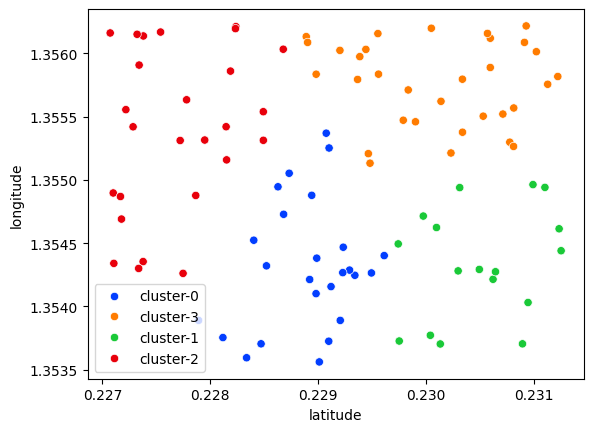

In [ ]:
sns.scatterplot(x="latitude", y="longitude", data=d,hue=["cluster-{}".format(x) for x in labels],palette="bright");